In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

color_dict_ = {
    "Cu": "#E6E328",
    "Pd": "#3B39B3",
    "Ni": "#B83A68",
    'Blank':'#808080'
}

df = pd.read_csv('a1_energy_diagram_metal_yield_piperidine.csv')


# Convert energy values from Hartree to kcal/mol
energy_columns = ['E_diff_oac', 'E_diff_ncc', 'E_diff_dpc']
for column in energy_columns:
    df[column] = df[column] * 627.509

# Update the energy difference to accumulate
df['E_diff_ncc'] += df['E_diff_oac']
df['E_diff_dpc'] += df['E_diff_ncc']

# ccol = ['ligand','metal', 'E_diff_oac', 'E_diff_ncc', 'E_diff_dpc', 'yield']
df = df[(df['E_diff_dpc'] > -1000) & (df['E_diff_dpc'] < 28)].dropna()

# df_new = df[ccol]#.set_index("metal").transpose()
df_new_oac = df[['ligand', 'metal', 'E_diff_oac', 'yield']]
df_new_oac['metal'] = df_new_oac['metal'].apply(lambda x: x + '_oac')
df_new_oac = df_new_oac.rename(columns={ 
    'E_diff_oac':'energy'
})
df_new_ncc = df[['ligand', 'metal', 'E_diff_ncc', 'yield']]
df_new_ncc['metal'] = df_new_ncc['metal'].apply(lambda x: x + '_ncc')
df_new_ncc = df_new_ncc.rename(columns={
    'E_diff_ncc':'energy'
})
df_new_dpc = df[['ligand', 'metal', 'E_diff_dpc', 'yield']]
df_new_dpc['metal'] = df_new_dpc['metal'].apply(lambda x: x + '_dpc')
df_new_dpc = df_new_dpc.rename(columns={
    'E_diff_dpc':'energy'
})
df_starting = pd.DataFrame({'ligand':[''], 'metal':['Starting Material'], 'energy':[-0.01], 'yield':[0]})
df_product = pd.DataFrame({'ligand':[''], 'metal':['Product'], 'energy':[ -15.163559], 'yield':[0]})

df_space0 = pd.DataFrame({'metal':['1' for x in range(100)], 
                          'energy':[np.nan for x in range(100)],
                          'yield':[0 for x in range(100)],
                         })
df_space1 = pd.DataFrame({'ligand':['' for x in range(100)], 'metal':['1' for x in range(100)], 'energy':[np.nan for x in range(100)],
                          'yield':[0 for x in range(100)],
                         })

df_space2 = pd.DataFrame({'ligand':['' for x in range(100)], 'metal':['2' for x in range(100)], 
                          'energy':[np.nan for x in range(100)], 
                          'yield':[0 for x in range(100)],
                         })

df_space22 = pd.DataFrame({'ligand':['' for x in range(100)], 'metal':['22' for x in range(100)],
                           'energy':[np.nan for x in range(100)],
                           'yield':[0 for x in range(100)],
                          })

df_space3 = pd.DataFrame({'ligand':['' for x in range(100)], 'metal':['3' for x in range(100)], 
                          'energy':[np.nan for x in range(100)],
                          'yield':[0 for x in range(100)],
                         })

df_space33 = pd.DataFrame({'ligand':['' for x in range(100)], 'metal':['33' for x in range(100)], 
                           'energy':[np.nan for x in range(100)],
                           'yield':[0 for x in range(100)],
                          })

df_space4 = pd.DataFrame({'ligand':['' for x in range(100)], 'metal':['4' for x in range(100)], 
                          'energy':[np.nan for x in range(100)],
                          'yield':[0 for x in range(100)],
                         })

# df_space5 = pd.DataFrame({'metal':['5' for x in range(100)], 'energy':[np.nan for x in range(100)]})


df_all = pd.concat([df_starting,df_space1, df_new_oac, df_space2, 
                    df_space22, 
                    df_new_ncc, 
                    df_space3, 
                    df_space33,
                    df_new_dpc, df_space4, df_product,#df_space5
                   ])
df_all = df_all.reset_index()



/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_11464/2027751859.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_oac['metal'] = df_new_oac['metal'].apply(lambda x: x + '_oac')
/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_11464/2027751859.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_ncc['metal'] = df_new_ncc['metal'].apply(lambda x: x + '_ncc')
/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_11464/2027751859.py:41: SettingWithCopyWarning: 
A valu

In [2]:
# import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc


def plot_boxplot(result, group_col, p_col, info ,saved=False, figure={'x':10, 'y':6}):
    plt.figure(figsize=(figure['x'], figure['y']))

    sns.set(style="whitegrid", context="notebook")  # You can try "paper" for a smaller scale
    color_dict_ = {
    "Cu": "#E6E328",
    "Pd": "#3B39B3",
    "Ni": "#B83A68",
    'Blank':'#808080',
    'Starting Material':'#808080',
    'Product':'#808080',
    '1':'#808080',
    '2':'#808080',
    '22':'#808080',
    '3':'#808080',
    '33':'#808080',
    '4':'#808080',
    '5':'#808080',

        }
    custom_color = {}
    for k, v in color_dict_.items():
        for x in list(set(result[group_col].to_list())):
            if str(x).split('_')[0] == k:
                custom_color[x] = v
                
    result_copy = result.copy()
#     result_copy = result_copy[result_copy[p_col]!=0]
    
    result_copy[p_col] = result_copy[p_col]/100
#     result_copy = result_copy.sort_values(by=[group_col])
    count_data = result_copy.groupby(group_col).size()
    print('columns:', result_copy[group_col].unique())
    color_count = len(result_copy[group_col].unique())
    custom_palette = sns.color_palette(cc.glasbey, n_colors=color_count)

    boxplot = sns.boxplot(data=result_copy, x=group_col, y=f'{p_col}', palette=custom_color, #"viridis"
#                               showcaps=False,
                          width=0.3,
                        boxprops={'facecolor':'None', 'linewidth': 1.5,
                                 },  # Thinner box edges
                        whiskerprops={'linewidth': 1.5, 'color':'grey'},  # Thinner whiskers
                        medianprops={'linewidth': 1.5, 'color':'grey'},  # Thinner median line
                      capprops=dict(color='grey'),
                        showfliers=False,
                          gap=0.1,
                                              )
    # Adding jittered strip plot on top of the boxplot
#     sns.stripplot(
#         data=result_copy,
#         x=group_col,
#         y=f'{p_col}',
#         jitter=True,
#         alpha=0.4  # Transparency for points
#     )

#     print('result_copy.describe:', result_copy.describe())
    highlight = result_copy[result_copy[f'yield'] == 0.5273]
#     highlight = highlight[highlight[group_col]=='Pd']
    print('highlight===>', highlight)
    plt.scatter(highlight[group_col], highlight[f'{p_col}'], 
                edgecolors='black', facecolors='none', linewidths=2,
                s=50, zorder=5)


    plt.xlabel(info['x_label'], fontsize=14)
    plt.ylabel(info['y_label'], fontsize=14)
    
#     plt.xticks(rotation=90, fontsize=12)
    
#     x_labels = 
    new_labels = [label.get_text().split('_')[0] for label in boxplot.get_xticklabels()]
    label_s = []
    new_labels = ['' if x in ['1', '2','22', '3', '33', '4', '5'] else x for x in new_labels]

    
    new_labels[0] = ''
    new_labels[-1] = ''
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    sns.despine(trim=True)  # Remove top and right spines
    plt.grid(True, which='major', linestyle='--', linewidth=0.75, alpha=0.7)
    plt.tight_layout()
    boxplot.set_xticklabels(new_labels)
    group_labels = ['Starting Material','A','B', 'C', 'Product']

    x_ticks_positions = boxplot.get_xticks()

    group_ranges = [
        range(0, 1),    
        range(2, 5),    
        range(7, 10),
        range(12, 15),
        range(16, 17)
    ]

    line_y_position = max(result_copy[p_col]) +5
    label_y_position = line_y_position + 5

    for i, group_range in enumerate(group_ranges):
        start_pos = x_ticks_positions[group_range.start]
        end_pos = x_ticks_positions[group_range.stop - 1]
        mid_pos = (start_pos + end_pos) / 2
        boxplot.plot([start_pos, end_pos], [line_y_position, line_y_position], 
                    color='grey', linestyle='-', linewidth=1.5,
                    )
        
        boxplot.text(mid_pos, label_y_position, group_labels[i], ha='center', 
                     color='black',
                     va='bottom', fontsize=14, weight='bold')

        
    boxplot.set_ylim(min(result_copy[p_col]) - 10, max(result_copy[p_col]) + 10)
    

    
#     print(result_copy[group_col].unique())
    
    for group, color in color_dict_.items():
        sns.stripplot(
        x=group_col, y=f'{p_col}',
        data=result_copy[result_copy['metal_found'] == group],        
        color=color, jitter=False, dodge=True, 
#             alpha=result_copy['yield'] +0.17,
            zorder=1,
             alpha=0.8,
    )
#     min_val = min(result_copy[p_col])
#     max_val = max(result_copy[p_col])

# #     for ax in axes:
#     ax.set_ylim(min_val*1.5, max_val*1.5)


#     ii = 0
#     for i, label in enumerate(new_labels):  
#         if i == 0 or i == len(new_labels)-1:
#             continue
            
#         elif label in ['']:
#             plt.axvline(i, color='grey', linestyle='--', linewidth=0.8)
#         else:
#             pass
#         ii+=1
        
        
    
    if saved:
        plt.savefig(f"{info['f_path']}.svg", dpi=300, bbox_inches='tight')
    plt.show()

    


columns: ['Starting Material' '1' 'Cu_oac' 'Ni_oac' 'Pd_oac' '2' '22' 'Cu_ncc'
 'Ni_ncc' 'Pd_ncc' '3' '33' 'Cu_dpc' 'Ni_dpc' 'Pd_dpc' '4' 'Product']
highlight===> Empty DataFrame
Columns: [index, ligand, metal, energy, yield, metal_found]
Index: []


/var/folders/hp/ltxd472947ndx3kypb8scq3w0000gr/T/ipykernel_11464/4046599020.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=result_copy, x=group_col, y=f'{p_col}', palette=custom_color, #"viridis"


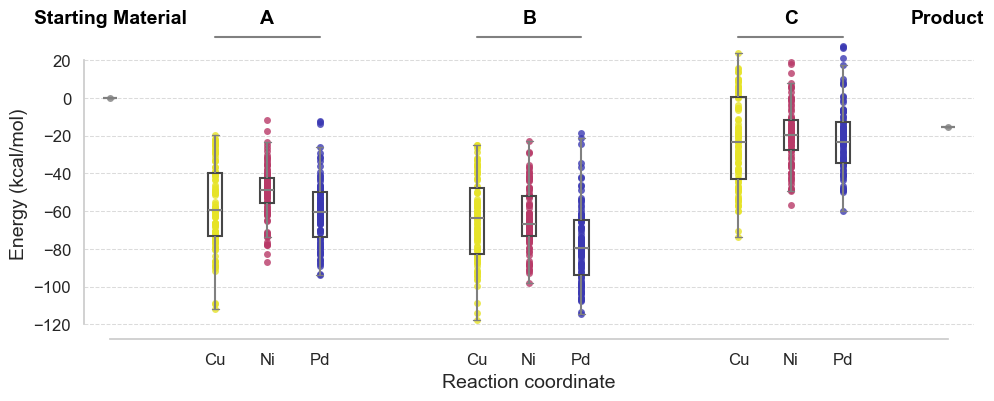

In [3]:
group_col = 'metal'
p_col = 'energy'#f'{prod_col}_mean_difference'

info = {}
info['x_label'] = f"Reaction coordinate"
info['y_label'] = "Energy (kcal/mol)"

f_path = f"./code_with_more_space_without_line_piperidine"
info['f_path'] = f_path

result = df_all.copy()
result[p_col]= result[p_col].apply(lambda x: x*100)
result['metal_found'] = result[group_col].apply(lambda x: str(x).split('_')[0])
info['f_path'] = f_path
plot_boxplot(result, group_col, p_col ,saved=True, info=info, figure={'x':10, 'y':4})